In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import os
from load_quilt_data import load_data
import keras
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Convolution1D, MaxPooling1D, Flatten, BatchNormalization, Dense, SimpleRNN
from keras import metrics
from keras.activations import relu, sigmoid, softmax
from keras import backend as K
import numpy as np
from load_quilt_data import load_data
from keras.models import load_model
import sklearn.metrics as metrics
from visualise_data import plot_confusion_matrix
from keras.preprocessing import sequence
import numpy as np
import matplotlib.pyplot
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import h5py
from pylab import *
import numpy as np

Using TensorFlow backend.


In [2]:
def readHDF(path):

    with h5py.File(path,'r') as hdf:

                
        Cluster = hdf.get('Cluster')
   
        Cluster_Input = Cluster.get('Input')
        Cluster_Output = Cluster.get('Output')
        
        x_train = np.array(Cluster_Input.get('x_train_mc'))
        y_train = np.array(Cluster_Output.get('y_train_mc'))
        x_test = np.array(Cluster_Input.get('x_test_mc'))
        y_test = np.array(Cluster_Output.get('y_test_mc'))


        x_train = np.array(x_train)
        y_train = np.array(y_train)
        x_test = np.array(x_test)
        y_test = np.array(y_test)


        print('x train: ',np.shape(x_train),'y train: ',np.shape(y_train),'x test: ',np.shape(x_test),'y test: ',np.shape(y_test))

        

    return (x_train, y_train, x_test, y_test)





In [19]:
#0= Car in, 1= Car out, 2= Motorcycle, 3= Pedestrian'

In [10]:
#convert cmp data to cn data
def convert_y(ys):
    
    new_y = []
    for y in ys:
        if y[3]== 1 or y[2] == 1:
            new_y.append(0)
        else:
            new_y.append(1)
    new_y = np.asarray(new_y)
    print('new shape: ',np.shape(new_y))

    return(new_y)

#0= Car in, 1= Car out, 2= Motorcycle, 3= Pedestrian'



In [11]:
path = "D:\\ParkHere\\Hdf_data\\081118_Hdf_all_data_right_norm.h5"
x_train, y_train_mc, x_test, y_test_mc = readHDF(path)
y_train_cn = convert_y(y_train_mc)
y_test_cn = convert_y(y_test_mc)


x train:  (3259, 61, 4) y train:  (3259, 4) x test:  (814, 61, 4) y test:  (814, 4)
new shape:  (3259,)
new shape:  (814,)


In [5]:
#validate model
def plot_wrongs(modelPath, x_test, y_test):
    
    model = load_model(modelPath)
    layer_output = model.predict(x_test, verbose = 0)
    layer_output = np.round(layer_output)

    #print(np.shape(y_test), y_diff, layer_output[0:100])
    #y_true_labels = np.argmax(y_test, axis=1)  # only necessary if output has one-hot-encoding, shape=(n_samples)

    #y_pred_labels = np.argmax(layer_output, axis=1)  # only necessary if output has one-hot-encoding, shape=(n_samples)
    confusion_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=layer_output) 
    class_names = ('0', '1')
    plt.figure()
    plot_confusion_matrix(confusion_matrix, classes=class_names,
                          title='Confusion matrix')
    return(layer_output)
    




In [14]:
# make new input and output, only cars: binary output for car in or car out
def create_new_test_data(layer_output,x_test, y_test):
    
    new_output = []
    new_x_test = []
    for l,x,y in zip(layer_output, x_test, y_test):
        #print(np.shape(y))
        if l == 1:
            if y[0] == 1:
                new_output.append(0)
                new_x_test.append(x)

            elif y[1] == 1:
                new_output.append(1)
                new_x_test.append(x)


    new_output = np.asarray(new_output)
    new_x_test = np.asarray(new_x_test)
    print(shape(new_output), shape(new_x_test))
    return(new_output, new_x_test)

Confusion matrix, without normalization


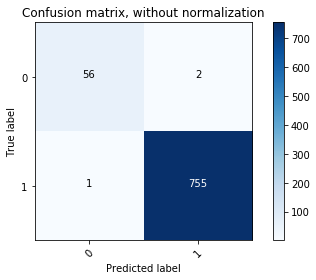

(755,) (755, 61, 4)
[0.] [[ 0.00234742  1.          0.          1.        ]
 [ 0.05868545  1.          1.30003     1.        ]
 [ 0.78638498  1.          1.30003     0.        ]
 [ 1.          1.          0.          0.        ]
 [ 0.         -1.         -1.         -1.        ]
 [ 0.         -1.         -1.         -1.        ]
 [ 0.         -1.         -1.         -1.        ]
 [ 0.         -1.         -1.         -1.        ]
 [ 0.         -1.         -1.         -1.        ]
 [ 0.         -1.         -1.         -1.        ]
 [ 0.         -1.         -1.         -1.        ]
 [ 0.         -1.         -1.         -1.        ]
 [ 0.         -1.         -1.         -1.        ]
 [ 0.         -1.         -1.         -1.        ]
 [ 0.         -1.         -1.         -1.        ]
 [ 0.         -1.         -1.         -1.        ]
 [ 0.         -1.         -1.         -1.        ]
 [ 0.         -1.         -1.         -1.        ]
 [ 0.         -1.         -1.         -1.        ]
 [ 0. 

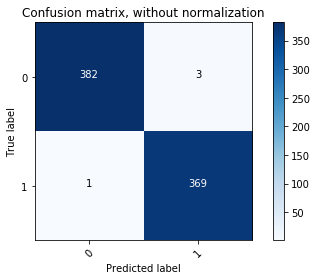

In [16]:
modelPath = 'D:\ParkHere\Keras_models\CNN_model_'+'cn'+'.h5'
layer_output  = plot_wrongs(modelPath, x_test, y_test_cn)
y_test_dd,x_test_dd = create_new_test_data(layer_output,x_test, y_test_mc)
print(layer_output[0],x_test[0], y_test_cn[0])

modelPath = 'D:\ParkHere\Keras_models\CNN_model_'+'dd'+'.h5'
layer_output_2  = plot_wrongs(modelPath, x_test_dd, y_test_dd)